Professor Wu

DS 4400: Machine Learning I

Ryan Tietjen

9/25/24

**Assignment 2**

## Question 1. Use numpy (all the CSV files can be found on the data folder inside HW2) (10 pts)
1) load hw_2_A.csv as variable A
2) load hw_2_B.csv as variable B
3) load hw_2_C.csv as variable C
4) load hw_2_D.csv as variable D
5) load hw_2_E.csv as variable E
6) load hw_2_x.csv as variable x
7) load hw_2_y.csv as variable y
8) load hw_2_z.csv as variable z

In [1]:
import numpy as np
import sys
np.set_printoptions(precision=4)
np.set_printoptions(threshold=30)
np.set_printoptions(linewidth=300)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)

In [2]:
import numpy as np
from numpy import genfromtxt
from numpy import trace
A = genfromtxt('hw_2_A.csv', delimiter = ',')
B = genfromtxt('hw_2_B.csv', delimiter = ',')
C = genfromtxt('hw_2_C.csv', delimiter = ',')
D = genfromtxt('hw_2_D.csv', delimiter = ',')
E = genfromtxt('hw_2_E.csv', delimiter = ',')
x = genfromtxt('hw_2_x.csv', delimiter = ',')
y = genfromtxt('hw_2_y.csv', delimiter = ',')
z = genfromtxt('hw_2_z.csv', delimiter = ',')

x = x.reshape((x.size, 1)) 
y = y.reshape((y.size, 1)) 
z = z.reshape((z.size, 1)) 

## After loading these variables, use numpy to calculate the following (show the code and print out the results 20pt):

1) $max(⟨A, A⟩)$

In [3]:
print(np.max(trace(A.dot(A.T))))

292.05000000000007


2) $min(⟨A, B⟩)$

In [4]:
print(np.min(trace(A.dot(B.T))))

10.449999999999996


3) $sum(⟨C, D⟩)$

In [5]:
print(np.sum(trace(C.dot(D.T))))

-3.49


4) $average((C + D)x)$

In [6]:
print(np.average((C+D).dot(x)))

-0.4699999999999998


5) $max(⟨C^⊤, D^⊤⟩x)$

In [7]:
print(np.max(np.trace(C.T.dot(D.T.T)) * (x)))

0.3489999999999999


6) $min(x ⊗ z)$

In [8]:
print(np.min(x.dot(z.T)))

-3.7199999999999998


7) $(x ⊗ z)$

In [9]:
print(x.dot(z.T))

[[-3.72  0.12  0.24]
 [-1.86  0.06  0.12]
 [ 0.   -0.   -0.  ]
 [ 0.31 -0.01 -0.02]
 [-3.72  0.12  0.24]]


8) $sum(A + B − 10)$

In [10]:
print(np.sum(A+B-10))

-2987.2000000000003


9) $average(A^TB)$

In [11]:
print(np.average(A.T.dot(B)))

-2.7744444444444465


10) $E^TC^TDx$

In [12]:
print(E.T.dot(C.T).dot(D).dot(x))

[[ 8.8684]
 [-4.502 ]
 [-3.0041]
 [-5.5886]]


## Question 2. Given the following data (10pts)

$
\begin{bmatrix}
    x & y \\
    1 & 1 \\
    2 & 1 \\
    2 & 2 \\
    3 & 2 \\
\end{bmatrix}
$

1) Use python to plot out the 4 points of the data.
2) Write your own linear regression code and solve it with gradient descent to identify a function f(x) such
that given an x value, it returns the best prediction of y. Your function should be really similar to the red
line as show in the plot below.
3) Once you have your own function, use Numpy to plot the predicted line along with the 4 points to show
that the line fits well with the points. Your result should look very similar to the plot below. (The example
code that plots points and lines is in lecture 4).


Note: Remember that the equation of a line is

f(x) = ax + b.
Therefore, in gradient descent, you would need to identify a and b.

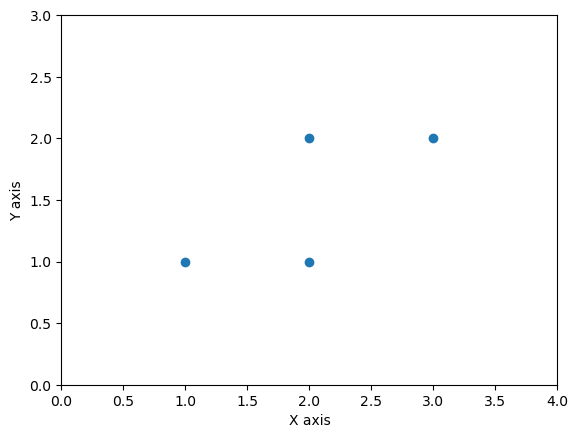

In [13]:
import matplotlib.pyplot as plt
x2 = np.array([[1], [2], [2], [3]])
y2 = np.array([[1], [1], [2], [2]])
phi = np.array([[1, 1],
              [2, 1],
              [2, 1],
              [3, 1]])
plt.scatter(x2, y2)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.xlim(0, 4) 
plt.ylim(0, 3)
plt.show()

In [14]:
from numpy.random import randn
d = 2
w = randn(d,1)
lr = 0.1
n = 4
def f(w):
    num = 0
    for xi, yi in zip(phi,y2):
        xi = np.reshape(xi, (d,1))
        num += (w.T.dot(xi) - yi)**2
    return (num / n).item()

In [15]:
def f_dx(w):
    num = 0
    for xi, yi in zip(phi,y2):
        xi = np.reshape(xi, (d,1))
        num += (w.T.dot(xi) - yi)*(xi)
    return (2/n) * num

In [16]:
f_value_list = []
for i in range(310):
    w = w - lr * f_dx(w)
    f_value_list.append(f(w))
print("Best w:")
print(w)

Best w:
[[0.5011]
 [0.4977]]


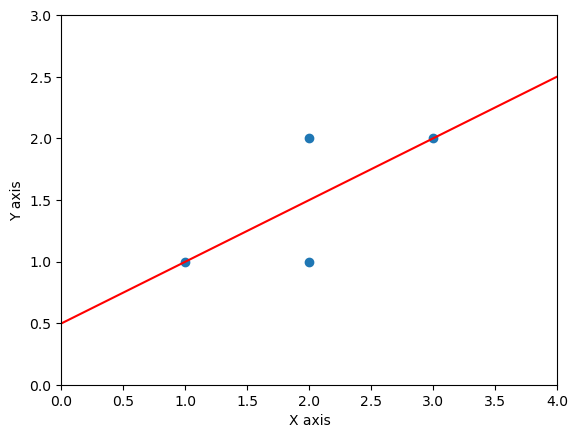

In [17]:
import matplotlib.pyplot as plt
a = w[0]
b = w[1]

x_values = [0, 4]
y_values = a * x_values + b 

plt.plot(x_values, y_values, 'r-') 

plt.scatter(x2, y2)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.xlim(0, 4) 
plt.ylim(0, 3)
plt.show()

## Question 3. Given the following data (10pts)

$
\begin{bmatrix}
    x & y \\
    1 & 1 \\
    2 & 1 \\
    1.5 & 0 \\
    3 & 2 \\
\end{bmatrix}
$

Assume that the function is a parabola where

$f(x) = ax^2 + bx + c$

1) Write the regression code with gradient descent to identify a function f(x) such that given an x value, it
returns the best prediction of y.
2) Once you have your own function, plot out the 4 points and the line as predicted by your function f(x).

In [18]:
d = 3
w = np.array([[1], [1], [1]])
print(w)
lr = 0.01
n = 4

x3 = np.array([[1],
               [2],
               [1.5],
               [3]])

y3 = np.array([[1],
               [1],
               [0],
               [2]])

phi = np.array([[1, 1, 1],
               [4, 2, 1],
               [2.25, 1.5, 1],
               [9, 3, 1]])

[[1]
 [1]
 [1]]


In [19]:
def f3(w):
    num = 0
    for xi, yi in zip(phi,y3):
        xi = np.reshape(xi, (d,1))
        num += (w.T.dot(xi) - yi)**2
    return (num / n).item()

In [20]:
def f3_dx(w):
    num = 0
    for xi, yi in zip(phi,y3):
        xi = np.reshape(xi, (d,1))
        num += (w.T.dot(xi) - yi)*(xi)
    return (2/n) * num

In [21]:
f_value_list = []
for i in range(25000):
    w = w - lr * f3_dx(w)
    f_value_list.append(f3(w))
print("Best w:")
print(w)

Best w:
[[ 0.7889]
 [-2.5226]
 [ 2.5242]]


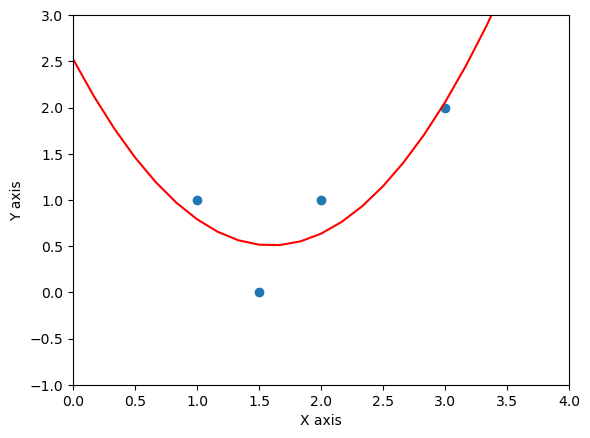

In [22]:
a = w[0]
b = w[1]
c = w[2]

x_values = np.linspace(0,4,25)
y_values = (x_values**2*a) + (b * x_values) + c 

plt.plot(x_values, y_values, 'r-') 

plt.scatter(x3, y3)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.xlim(0, 4) 
plt.ylim(-1, 3)
plt.show()

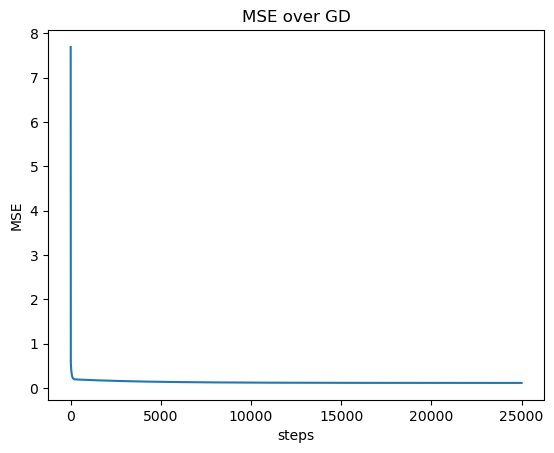

In [23]:
plt.plot(f_value_list)
plt.title('MSE over GD')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.show() 

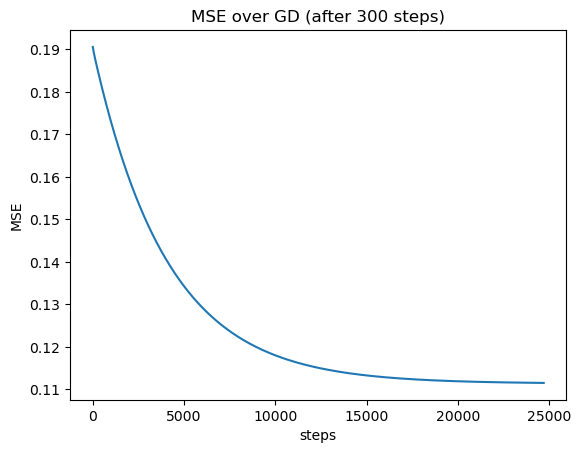

In [24]:
plt.plot(f_value_list[300:])
plt.title('MSE over GD (after 300 steps)')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.show() 

## Question 4. Write out the derivation to get derivatives for all 17 functions in the class. Note that the 17 functions are in lecture 3 part 2. (20pts)

## Question 5. Use Python to check that all your derivatives are correct. (20pts) (Note: Skip the SVM objective for now.)

## 1. Linear: $f(x) = y^Tx$

Since $y$ is a constant, the derivative of f(x) is trivial

$f'(x) = \boxed{y}$

In [25]:
import autograd.numpy as np
from autograd import grad
def f1(x, y):
    return np.dot(np.transpose(y), x)

def f1_dx(x, y):
    return y

auto_grad = grad(f1)
y = np.array([[2],[5]])

for i in range(3):
    x = np.random.random((2,1))
    print("Auto gradient:\n", auto_grad(x, y))
    print("Theoretical gradient:\n", f1_dx(x, y))
    print("---------------------------------------")

Auto gradient:
 [[2.]
 [5.]]
Theoretical gradient:
 [[2]
 [5]]
---------------------------------------
Auto gradient:
 [[2.]
 [5.]]
Theoretical gradient:
 [[2]
 [5]]
---------------------------------------
Auto gradient:
 [[2.]
 [5.]]
Theoretical gradient:
 [[2]
 [5]]
---------------------------------------


## 2. Quadratic: $f(x) = x^TAx$

Let $x =
\begin{bmatrix}
    x_1 \\
    x_2
\end{bmatrix}
$ and $ A =
\begin{bmatrix}
    a_{1,1} & a_{1,2} \\
    a_{2,1} & a_{2,2} 
\end{bmatrix}
$

Then $x^TAx = a_{1,1}x_1^2 + a_{1,2}x_1x_2 + a_{2,1}x_1x_2 + a_{2,2}x_2^2$

$f'(x) = 
\begin{bmatrix}
    \frac{df}{dx_1} \\
    \frac{df}{dx_2} 
\end{bmatrix}
$ $=
\begin{bmatrix}
    2a_{1,1}x_1 + a_{1,2}x_2 + a_{2,1}x_2 \\
    2a_{2,2}x_2 + a_{2,1}x_1 + a_{1,2}x_1
\end{bmatrix}
$ $=
\begin{bmatrix}
    2a_{1,1} & a_{1,2}+a_{2,1} \\
    a_{1,2}+a_{2,1} & 2a_{2,2} & 
\end{bmatrix}
\begin{bmatrix}
    x_1 \\
    x_2
\end{bmatrix}
$ = 
$\boxed{(A + A^T)x}
$

In [26]:
def f2(x, A):
    return np.dot(np.dot(np.transpose(x), A), x)

def f2_dx(x, A):
    return np.dot((A + np.transpose(A)), x)

auto_grad = grad(f2)
A = np.array([[3, 1],
             [4, 2]])

for i in range(3):
    x = np.random.random((2,1))
    print("Auto gradient:\n", auto_grad(x, A))
    print("Theoretical gradient:\n", f2_dx(x, A))
    print("---------------------------------------")

Auto gradient:
 [[6.237 ]
 [5.1351]]
Theoretical gradient:
 [[6.237 ]
 [5.1351]]
---------------------------------------
Auto gradient:
 [[2.7165]
 [2.2058]]
Theoretical gradient:
 [[2.7165]
 [2.2058]]
---------------------------------------
Auto gradient:
 [[3.789 ]
 [3.0422]]
Theoretical gradient:
 [[3.789 ]
 [3.0422]]
---------------------------------------


## 3. Trace of Quadratic: $f(x) = Tr(x^TAx)$

Note that the trace of a scalar $n$ is $n$

Since $x^TAx$ results in a scalar, the trace of $x^TAx$ is $x^TAx$

So, $\frac{d}{dx}Tr(x^TAx) = \frac{d}{dx}x^TAx$

By question 2, $\frac{d}{dx}x^TAx = (A+A^T)x$

So, $f'(x) = \boxed{(A+A^T)x}$

In [27]:
from numpy import trace
def f3(x, A):
    return np.trace(np.dot(np.dot(np.transpose(x), A), x))

def f3_dx(x, A):
    return np.dot((A + np.transpose(A)), x)

auto_grad = grad(f3)
A = np.array([[3, 1],
             [4, 2]])

for i in range(3):
    x = np.random.random((2,1))
    print("Auto gradient:\n", auto_grad(x, A))
    print("Theoretical gradient:\n", f3_dx(x, A))
    print("---------------------------------------")

Auto gradient:
 [[3.9821]
 [3.2287]]
Theoretical gradient:
 [[3.9821]
 [3.2287]]
---------------------------------------
Auto gradient:
 [[6.8218]
 [5.5687]]
Theoretical gradient:
 [[6.8218]
 [5.5687]]
---------------------------------------
Auto gradient:
 [[9.5159]
 [7.7819]]
Theoretical gradient:
 [[9.5159]
 [7.7819]]
---------------------------------------


## 4. Activation Function: $f(w) = ReLU(w^Tx)$

let $g = w^Tx$

then $f(w) = ReLU(g)$

$\frac{df}{dg} = 1_{g>0} \hspace{1cm} \frac{dg}{dw} = x$

$f'(w) = \frac{df}{dg} \frac{dg}{dw} = 1_{g>0}x = \boxed{1_{w^Tx>0}x}$

In [28]:
def f4(w, x):
    return np.maximum(0, np.dot(np.transpose(w), x))

def f4_dx(w, x):
    if np.dot(np.transpose(w), x) > 0:
        return 1 *x
    else:
        return 0 * x

auto_grad = grad(f4)
x = np.array([[3],
              [1]])

for i in range(5):
    x = np.random.random((2,1))
    w = np.random.randn(2,1)
    print("Auto gradient:\n", auto_grad(w, x))
    print("Theoretical gradient:\n", f4_dx(w, x))
    print("---------------------------------------")

Auto gradient:
 [[0.0233]
 [0.5436]]
Theoretical gradient:
 [[0.0233]
 [0.5436]]
---------------------------------------
Auto gradient:
 [[0.7088]
 [0.3383]]
Theoretical gradient:
 [[0.7088]
 [0.3383]]
---------------------------------------
Auto gradient:
 [[0.0469]
 [0.4053]]
Theoretical gradient:
 [[0.0469]
 [0.4053]]
---------------------------------------
Auto gradient:
 [[0.]
 [0.]]
Theoretical gradient:
 [[0.]
 [0.]]
---------------------------------------
Auto gradient:
 [[0.4105]
 [0.8415]]
Theoretical gradient:
 [[0.4105]
 [0.8415]]
---------------------------------------


## 5. Linear Regression: $f(w) = \frac{1}{n} \sum_{i=1}^n (w^Tx_i - y_i)^2$

let $g = w^Tx_i - y_i$

then $f(w) = \frac{1}{n} \sum_{i=1}^n (g)^2$

$\frac{df}{dg} = \sum_{i=1}^n g $

$\frac{dg}{dw} = x_i$

$f'(w) = \frac{df}{dg} \frac{dg}{dw} = \boxed{\sum_{i=1}^n (w^Tx_i - y_i)x_i}$

In [29]:
def f5(w, x, y):
    num = 0
    n = x.shape[1]
    for xi, yi in zip(x ,y):
        xi = np.reshape(xi, (2,1))
        num += (np.dot(np.transpose(w), xi) - yi)**2
    return num / n

def f5_dx(w, x, y):
    num = 0
    for xi, yi in zip(x,y):
        xi = np.reshape(xi, (2,1))
        num += (np.dot(np.transpose(w), xi) - yi)*(xi)
    return num

auto_grad = grad(f5)
y = np.array([[3],
              [3]])
x = np.array([[4, 2],
             [2, 4]])

for i in range(2):
    w = np.random.random((2,1))
    print("Auto gradient:\n", auto_grad(w, x, y))
    print("Theoretical gradient:\n", f5_dx(w, x, y))
    print("---------------------------------------")

Auto gradient:
 [[-7.1441]
 [-5.6244]]
Theoretical gradient:
 [[-7.1441]
 [-5.6244]]
---------------------------------------
Auto gradient:
 [[-2.4941]
 [ 1.0516]]
Theoretical gradient:
 [[-2.4941]
 [ 1.0516]]
---------------------------------------


## 6. Multivariate Gaussian Tr: $f(x) = e^{-Tr(x^TAx)}$

let $g = Tr(x^TAx)$

then $f(x) = e^{-g}$

$\frac{df}{dg} = -e^{-g}$

$\frac{dg}{dx} = (A + A^T)x$

$f'(x) = \frac{dg}{dx} \frac{dg}{dx} = \boxed{-e^{-Tr(x^TAx)}(A + A^T)x}$

In [30]:
def f6(x, A):
    return np.exp(-np.trace(np.dot(np.dot(np.transpose(x),A), x)))

def f6_dx(x, A):
    temp = np.exp(-np.trace(np.dot(np.dot(np.transpose(x),A), x)))
    return -temp * np.dot((A + np.transpose(A)), x)

auto_grad = grad(f6)
A = np.array([[3, 1],
             [4, 2]])

for i in range(3):
    x = np.random.random((2,1))
    print("Auto gradient:\n", auto_grad(x, A))
    print("Theoretical gradient:\n", f6_dx(x, A))
    print("---------------------------------------")

Auto gradient:
 [[-0.0759]
 [-0.0619]]
Theoretical gradient:
 [[-0.0759]
 [-0.0619]]
---------------------------------------
Auto gradient:
 [[-0.3894]
 [-0.3224]]
Theoretical gradient:
 [[-0.3894]
 [-0.3224]]
---------------------------------------
Auto gradient:
 [[-0.6877]
 [-0.5718]]
Theoretical gradient:
 [[-0.6877]
 [-0.5718]]
---------------------------------------


## 7. Multivariate Gaussian: $f(x) = e^{-x^TAx}$

let $g = x^TAx$

then $f(x) = e^{-g}$

$\frac{df}{dg} = -e^{-g}$

$\frac{dg}{dx} = (A + A^T)x$

$f'(x) = \frac{dg}{dx} \frac{dg}{dx} = \boxed{-e^{x^TAx}(A + A^T)x}$

In [31]:
def f7(x, A):
    return np.exp(-(np.dot(np.dot(np.transpose(x),A), x)))

def f7_dx(x, A):
    temp = np.exp(-np.trace(np.dot(np.dot(np.transpose(x),A), x)))
    return -temp * np.dot((A + np.transpose(A)), x)

auto_grad = grad(f7)
A = np.array([[3, 1],
             [4, 2]])

for i in range(3):
    x = np.random.random((2,1))
    print("Auto gradient:\n", auto_grad(x, A))
    print("Theoretical gradient:\n", f7_dx(x, A))
    print("---------------------------------------")

Auto gradient:
 [[-1.2609]
 [-1.0161]]
Theoretical gradient:
 [[-1.2609]
 [-1.0161]]
---------------------------------------
Auto gradient:
 [[-1.2006]
 [-0.9792]]
Theoretical gradient:
 [[-1.2006]
 [-0.9792]]
---------------------------------------
Auto gradient:
 [[-0.1102]
 [-0.0894]]
Theoretical gradient:
 [[-0.1102]
 [-0.0894]]
---------------------------------------


## 8. Sigmoid: $f(z) = \frac{1}{1+e^{-z}}$

let $g = 1 + e^{-z}$

then $f(z) = g^{-1}$

$\frac{df}{dg} = -g^{-2}$

$\frac{dg}{dw} = -e^z$

$f'(z) = \frac{df}{dg} \frac{dg}{dw} = \boxed{(1+e^{-z})^{-2}(e^{-z})}$

In [32]:
def f8(z):
    num = 1 + np.exp(-z)
    return (1 / num)

def f8_dx(z):
    num = (1 + np.exp(-z))**2
    return np.exp(-z) / num

auto_grad = grad(f8)

for i in range(3):
    z = np.random.rand()
    print("Auto gradient:\n", auto_grad(z))
    print("Theoretical gradient:\n", f8_dx(z))
    print("---------------------------------------")

Auto gradient:
 0.24123307745311093
Theoretical gradient:
 0.24123307745311093
---------------------------------------
Auto gradient:
 0.20909280075449063
Theoretical gradient:
 0.20909280075449063
---------------------------------------
Auto gradient:
 0.2499985782983699
Theoretical gradient:
 0.2499985782983699
---------------------------------------


## 9. Logistic Regression Objective: $f(w) = \frac{1}{1+e^{-w^Tx}}$

let $g = (1+e^{-w^Tx})$

let $u = w^Tx$

then $f(w) = g^{-1}$

$\frac{df}{dg} = -g^{-2}$

$\frac{dg}{du} = -e^{u}$

$\frac{du}{dw} = x$

$f'(w) = \frac{df}{dg} \frac{dg}{du} \frac{du}{dw} = \boxed{(1+e^{-w^Tx})^{-2}(e^{-w^Tx})(x)}$

In [33]:
def f9(w,x):
    num = np.exp(-np.dot(np.transpose(w),x))
    return 1 / (1 + num)

def f9_dx(w,x):
    num = np.exp(-np.dot(np.transpose(w),x))
    num1 = (1 + num)**2
    return (num / num1)*x

auto_grad = grad(f9)

for i in range(3):
    w = np.random.random((2,1))
    x = np.random.random((2,1))
    print("Auto gradient:\n", auto_grad(w,x))
    print("Theoretical gradient:\n", f9_dx(w,x))
    print("---------------------------------------")

Auto gradient:
 [[0.0092]
 [0.2023]]
Theoretical gradient:
 [[0.0092]
 [0.2023]]
---------------------------------------
Auto gradient:
 [[0.2347]
 [0.0461]]
Theoretical gradient:
 [[0.2347]
 [0.0461]]
---------------------------------------
Auto gradient:
 [[0.135 ]
 [0.0298]]
Theoretical gradient:
 [[0.135 ]
 [0.0298]]
---------------------------------------


## 10. L1 Norm: $f(x) = ||x||_1$

$f(x) = |x_1| + |x_2| + ... + |x_n|$

Note that $\frac{d}{dx} |x| = $ the sign of $x$ or $0$ if $x$ is $0$

$f'(x) = 
\begin{bmatrix}
    \frac{d}{dx_1} |x1| \\
    \frac{d}{dx_2} |x2| \\
    ...
\end{bmatrix} =
\begin{bmatrix}
    sign(x_1) \\
    sign(x_2) \\
    ...
\end{bmatrix} = \boxed{sign(x)}$

In [34]:
def f10(x):
    num = 0
    for xi in x:
        num += np.absolute(xi)
    return num

def f10_dx(x):
    return np.sign(x)

auto_grad = grad(f10)

for i in range(4):
    x = np.random.uniform(-1, 1, (2, 1))
    print("Auto gradient:\n", auto_grad(x))
    print("Theoretical gradient:\n", f10_dx(x))
    print("---------------------------------------")

Auto gradient:
 [[1.]
 [1.]]
Theoretical gradient:
 [[1.]
 [1.]]
---------------------------------------
Auto gradient:
 [[ 1.]
 [-1.]]
Theoretical gradient:
 [[ 1.]
 [-1.]]
---------------------------------------
Auto gradient:
 [[-1.]
 [-1.]]
Theoretical gradient:
 [[-1.]
 [-1.]]
---------------------------------------
Auto gradient:
 [[1.]
 [1.]]
Theoretical gradient:
 [[1.]
 [1.]]
---------------------------------------


## 11. L2 Norm: $f(x) = ||x||_2$

$f(x) = \sqrt{x_1^2 + x_2^2 + ... + x_n^2}$ 

let $g = x_1^2 + x_2^2 + ... + x_n^2$

$\frac{df}{dg} = \frac{1}{2} g^{\frac{-1}{2}}$

$\frac{dg}{dx} = 
\begin{bmatrix}
    \frac{dg}{dx_1} \\
    \frac{dg}{dx_2} \\
    ...
\end{bmatrix} = 
\begin{bmatrix}
    2x_1 \\
    2x_2 \\
    ...
\end{bmatrix} = 2x$

$\frac{df}{dg} \frac{dg}{dx} = g^{\frac{-1}{2}}x = \boxed{\frac{1}{||x||_2}x}$

In [35]:
def f11(x):
    num = 0
    for xi in x:
        num += xi**2
    return np.sqrt(num)

def f11_dx(x):
    num = 0
    for xi in x:
        num += xi**2
    return (1/np.sqrt(num))*x

auto_grad = grad(f11)

for i in range(4):
    x = np.random.uniform(-1, 1, (2, 1))
    print("Auto gradient:\n", auto_grad(x))
    print("Theoretical gradient:\n", f11_dx(x))
    print("---------------------------------------")

Auto gradient:
 [[0.7487]
 [0.6629]]
Theoretical gradient:
 [[0.7487]
 [0.6629]]
---------------------------------------
Auto gradient:
 [[-0.8657]
 [-0.5006]]
Theoretical gradient:
 [[-0.8657]
 [-0.5006]]
---------------------------------------
Auto gradient:
 [[-0.4461]
 [-0.895 ]]
Theoretical gradient:
 [[-0.4461]
 [-0.895 ]]
---------------------------------------
Auto gradient:
 [[ 0.9196]
 [-0.3928]]
Theoretical gradient:
 [[ 0.9196]
 [-0.3928]]
---------------------------------------


## 12. SVM objective: $f(w) = \sum_{i=1}^n ReLU(1 - y_i \langle x_i,w \rangle )$

let $g = 1 - y_i \langle x_i,w \rangle $

so $f(w) = \sum_{i=1}^n ReLU(g)$

$\frac{df}{dg} = 1_{(g>0)}$

$\frac{dg}{dx} = -y_ix_i$

$f'(w) = \frac{df}{dg} \frac{dg}{dx} = \boxed{- \sum_{i=1}^n 1_{(1 - y_i \langle x_i,w \rangle > 0)}y_ix_i}$

## 13. PCA objective: $f(x) = x^TAx - \lambda(x^Tx - 1)$

Note that $\frac{d}{dx} x^TAx = (A^T + A)x$

Also, $x^Tx = x^2$

So $\frac{d}{dx} x^Tx = 2x$

$f(x) = x^TAx - \lambda x^Tx - \lambda \cdot 1$

$f'(x) = \boxed{(A^T + A)x - 2 \lambda x}$

In [36]:
def f13(x, A, lambd):
    num = np.dot(np.dot(np.transpose(x), A), x)
    num2 = lambd*(np.dot(np.transpose(x), x) - 1)
    return num - num2

def f13_dx(x, A, lambd):
    return np.dot(np.transpose(A) + A, x) - 2*lambd*x

auto_grad = grad(f13)
A = np.array([[3, 1],
             [4, 2]])
lambd = 31

for i in range(4):
    x = np.random.randn(2,1)
    print("Auto gradient:\n", auto_grad(x, A, lambd))
    print("Theoretical gradient:\n", f13_dx(x, A, lambd))
    print("---------------------------------------")

Auto gradient:
 [[-103.5923]
 [  38.1746]]
Theoretical gradient:
 [[-103.5923]
 [  38.1746]]
---------------------------------------
Auto gradient:
 [[68.8252]
 [23.9579]]
Theoretical gradient:
 [[68.8252]
 [23.9579]]
---------------------------------------
Auto gradient:
 [[-79.7436]
 [ 32.8307]]
Theoretical gradient:
 [[-79.7436]
 [ 32.8307]]
---------------------------------------
Auto gradient:
 [[54.4492]
 [20.4606]]
Theoretical gradient:
 [[54.4492]
 [20.4606]]
---------------------------------------


## 14. Gaussian Maxiumum Likelihood: $f(\mu) = log(\prod_i^n \frac{1}{\sqrt{2 \pi \sigma ^2}} e^{-\frac{(x_i - \mu)^2}{2 \sigma ^2}})$

$f(\mu) = \sum_i^n ln (\frac{1}{\sqrt{2 \pi \sigma ^2}} e^{-\frac{(x_i - \mu)^2}{2 \sigma ^2}}) =$

$\sum_i^n ln (\frac{1}{\sqrt{2 \pi \sigma ^2}}) + \sum_i^n ln(e^{-\frac{(x_i - \mu)^2}{2 \sigma ^2}})$ = 

$\sum_i^n ln(e^{-\frac{(x_i - \mu)^2}{2 \sigma ^2}})$ = 

$\sum_i^n \frac{(x_i - \mu)^2}{2 \sigma ^2} -ln(e)$ = 

$-\sum_i^n \frac{(x_i - \mu)^2}{2 \sigma ^2}$ = 

$\frac{-1}{2 \sigma ^2}\sum_i^n (x_i - \mu)^2$

So, $f'(\mu) = \frac{-1}{2 \sigma ^2}\sum_i^n \frac{d}{d \mu} (x_i - \mu)^2$ =

$\frac{-2}{2 \sigma ^2}\sum_i^n (x_i - \mu) \cdot -1$ = 

$\boxed{\frac{1}{\sigma ^2}\sum_i^n (x_i - \mu)}$

In [37]:
def f14(mu, n, pi, sigma, x):
    val = 1
    for xi in x:
        num1 = (xi - mu)**2
        num2 = (2*sigma*sigma)
        num3 = np.sqrt(2*pi*sigma*sigma)
        
        num4 = 1 / num3
        num5 = num1 / num2
        
        num6 = np.exp(-num5)
        
        num7 = num4 * num6
        
        val = val * num7
    return np.log(val)

def f14_dx(mu, n, pi, sigma, x):
    val = 0
    for xi in x:
        num = xi - mu
        val = val + num
    num2 = 1 / (sigma * sigma)
    return val * num2

auto_grad = grad(f14)

n = 3.0
pi = np.pi
sigma = 31.0

for i in range(3):
    mu = np.random.rand()
    x = np.random.rand(3) * 10
    print("Auto gradient:\n", auto_grad(mu, n, pi, sigma, x))
    print("Theoretical gradient:\n", f14_dx(mu, n, pi, sigma, x))
    print("---------------------------------------")

Auto gradient:
 0.019693233719917096
Theoretical gradient:
 0.019693233719917096
---------------------------------------
Auto gradient:
 0.011924280999179391
Theoretical gradient:
 0.011924280999179393
---------------------------------------
Auto gradient:
 0.01795840584721606
Theoretical gradient:
 0.017958405847216065
---------------------------------------


## 15. Exponential Maxiumum Likelihood: $f(\lambda) = log( \prod_i^n \lambda e^{-\lambda x_i})$

$log(\prod_i^n \lambda \prod_i^n e^{-\lambda x_i}) = $

$log(\lambda^n \prod_i^n e^{-\lambda x_i}) = $

$log(\lambda^n e^{-\lambda \sum_i^n x_i}) = $

$log(\lambda^n) + log(e^{-\lambda \sum_i^n x_i}) = $


$n \cdot log(\lambda) + log(e^{-\lambda \sum_i^n x_i}) = $

$n \cdot log(\lambda) + -\lambda \sum_i^n x_i \cdot log(e^{ }) = $

$n \cdot log(\lambda) + -\lambda \sum_i^n x_i = $

So, $f'(\lambda) = \boxed{\frac{n}{\lambda} - \sum_i^n x_i}$

In [38]:
def f15(lam, x, n):
    val = 1
    for xi in x:
        num = lam * np.exp(-lam * xi)
        val *= num
    return np.log(val)

def f15_dx(lam, x, n):
    num = n / lam
    num2 = 0
    for xi in x:
        num2 += xi
    return num - num2

auto_grad = grad(f15)

n = 3.0
for i in range(3):
    lam = np.random.rand()
    x = np.random.rand(3)
    print("Auto gradient:\n", auto_grad(lam, x, n))
    print("Theoretical gradient:\n", f15_dx(lam, x, n))
    print("---------------------------------------")

Auto gradient:
 9.624416193530179
Theoretical gradient:
 9.624416193530177
---------------------------------------
Auto gradient:
 3.204747844841321
Theoretical gradient:
 3.204747844841321
---------------------------------------
Auto gradient:
 2.4566046969838453
Theoretical gradient:
 2.4566046969838453
---------------------------------------


## 16. Bernoulli Maxiumum Likelihood: $f(p) = log ( \prod_i^n p^{a_i}(1-p)^{1-a_i})$

$= \sum_i^n log(p^{a_i}(1-p)^{1-a_i} = $ 

$\sum_i^n a_i \cdot log (p) + (1-a_i)log(1-p) $

Note that:

$\frac{d}{dp}log(p) = \frac{1}{p}$

$\frac{d}{dp}log(1-p) = \frac{-1}{1-p}$

So, $f'(p) = \sum_i^n (\frac{a_i}{p} - \frac{1 - a_i}{1-p})$

Note that $\sum_i^n 1-a_i = 1 \cdot n - \sum_i^n a_i$

Hence, $f'(p) = \boxed{\frac{\sum_i^n a_i}{p} - \frac{n - \sum_i^n a_i}{1-p}}$

In [39]:
def f16(p, a):
    val = 1
    for ai in a:
        num = np.power(p, ai)*np.power((1-p), 1-ai)
        val *= num
    return np.log(val)

def f16_dx(p, a):
    num = np.sum(a)
    
    one = num / p
    
    numer = n - num
    denom = 1-p
    
    two = numer / denom
    
    return one - two

auto_grad = grad(f16)

a = [1, 0, 1, 0]
n = 4
for i in range(3):
    p = np.random.rand()
    print("Auto gradient:\n", auto_grad(p, a))
    print("Theoretical gradient:\n", f16_dx(p, a))
    print("---------------------------------------")

Auto gradient:
 1.6496518746909712
Theoretical gradient:
 1.6496518746909707
---------------------------------------
Auto gradient:
 3.7526841398532103
Theoretical gradient:
 3.7526841398532103
---------------------------------------
Auto gradient:
 1.3211411918649296
Theoretical gradient:
 1.3211411918649296
---------------------------------------


## 17. Uniform Maxiumum Likelihood: $f(a,b) = log ( \prod_i^n \frac{1}{b-a})$

$ = \sum_i^n log(\frac{1}{b-a}) = $

$\sum_i^n log((b-a)^{-1})$

let g = $b-a$

So, $f(a,b) = nlog(g) $

$\frac{df}{dg} = \frac{-n}{g}$

$\frac{dg}{da} = -1$

$\frac{dg}{db} = 1$

$\frac{df}{dg} \frac{dg}{da} = \frac{n}{b-a}$

$\frac{df}{dg} \frac{dg}{db} = \frac{-n}{b-a}$

$f'(a,b) =
\boxed{
\begin{bmatrix}
    \frac{n}{b-a} \\ 
    \frac{-n}{b-a}
\end{bmatrix}}$

In [40]:
def f17(a, b, n):
    val = 1.0
    num = (1/(b-a))
    for ni in range(n):
        val *= num
    return np.log(val)

def f17_dx(a, b, n):
    return np.array([n/(b-a), -n/(b-a)])

auto_grad = grad(f17)
n = 4
for i in range(3):
    a = np.random.rand()
    b = np.random.rand() + 2
    print("Auto gradient:\n", auto_grad(a, b, n))
    print("Theoretical gradient:\n", f17_dx(a, b, n))
    print("---------------------------------------")

Auto gradient:
 2.2070825491521644
Theoretical gradient:
 [ 2.2071 -2.2071]
---------------------------------------
Auto gradient:
 2.869010533608851
Theoretical gradient:
 [ 2.869 -2.869]
---------------------------------------
Auto gradient:
 3.067063827948752
Theoretical gradient:
 [ 3.0671 -3.0671]
---------------------------------------


## Question 6. [30pts] (Use Python for this question) You went around the campus and asked 1000 people 2 questions.

• How many hours a week do you spend with the people you truly love?

This data can be found in the data folder under ”Time with loved ones”

• time_with_loved_ones.csv

• happiness.csv

• What is your happiness level out of 10?

1) Use linear regression by assuming that the data can be described by the function

$f(x) = af1(x) + bf2(x)$

where

f$1(x) = x$ and $f2(x) = 1.$

Write your own gradient descent with Python code to find the best a and b values.

2) Plot out all the points in blue along with the equation f(x) in red.

3) According to your equation f(x), if you spend 15 hours a week with your loved ones, how happy would you be?

In [41]:
time_with_loved_ones = genfromtxt('time_with_loved_ones.csv', delimiter = ',')
happiness = genfromtxt('happiness_level.csv', delimiter = ',')

In [42]:
from numpy.random import randn
ones = np.ones((1000, 1))
time_with_loved_ones_original = time_with_loved_ones
time_with_loved_ones = time_with_loved_ones.reshape(1000, 1)
phi = np.hstack((time_with_loved_ones, ones))
d = phi.shape[1]
w = np.array([[1], [-1]])
lr = 0.0075
n = phi.shape[0]

def f20(w):
    num = 0
    for xi, yi in zip(phi, happiness):
        xi = np.reshape(xi, (d,1))
        num += (w.T.dot(xi) - yi)**2
    return (num / n).item()
def f20_dx(w):
    num = 0
    for xi, yi in zip(phi, happiness):
        xi = np.reshape(xi, (d,1))
        num += (w.T.dot(xi) - yi)*(xi)
    return (2/n) * num

In [43]:
f20_value_list = []
for i in range(1000):
    w = w - lr * f20_dx(w)
    f20_value_list.append(f20(w))  
print("Best w:")
print(w)


Best w:
[[0.4011]
 [0.3009]]


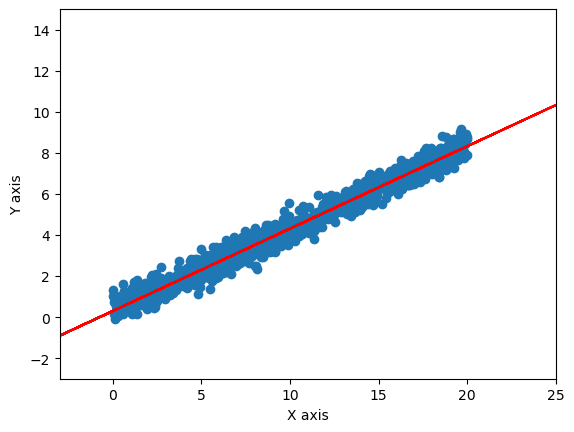

In [44]:
import matplotlib.pyplot as plt
import random
a = w[0]
b = w[1]

x_values = [random.randint(-5, 25) for _ in range(50)]
y_values = a * x_values + b 

plt.plot(x_values, y_values, 'r-') 

plt.scatter(time_with_loved_ones_original, happiness)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.xlim(-3, 25) 
plt.ylim(-3, 15)
plt.show()

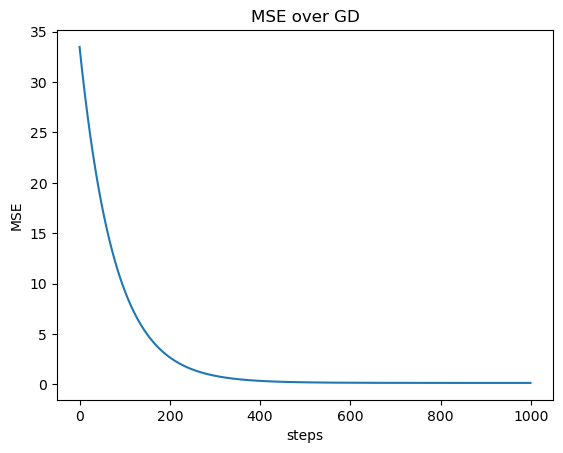

In [45]:
plt.plot(f20_value_list)
plt.title('MSE over GD')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.show() 

# According to your equation f(x), if you spend 15 hours a week with your loved ones, how happy would you be?

In [46]:
print(a)
print(b)

print(f"According to f(x), if you spend 15 hours a week with your loved ones, you will have a happiness rating of {a*15 - b} (on average)")

[0.4011]
[0.3009]
According to f(x), if you spend 15 hours a week with your loved ones, you will have a happiness rating of [5.7149] (on average)
